In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
IMAGE_SIZE = 72

In [3]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [4]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [5]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [6]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

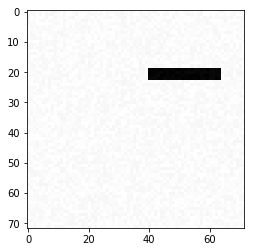

In [71]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

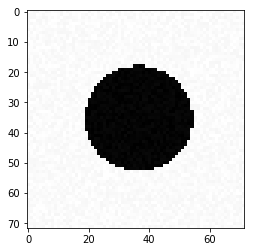

In [72]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

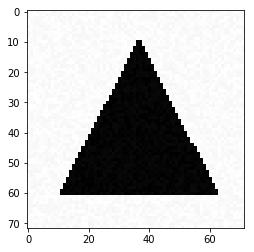

In [74]:
[im, v] = generate_a_triangle(10, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [7]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [8]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [77]:
X_train.shape


(300, 5184)

In [78]:
Y_train

array([2., 1., 2., 0., 0., 1., 1., 0., 0., 1., 2., 0., 1., 2., 2., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 2., 0., 2., 0., 1., 2., 2., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 2., 1., 0., 0., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 0., 0., 2., 0., 1., 2., 2., 2., 0., 2., 1., 1., 2.,
       1., 0., 2., 0., 2., 2., 0., 0., 1., 0., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 0., 1., 2., 1., 0., 0., 0., 1., 1., 1., 2., 2., 2.,
       0., 1., 1., 2., 1., 0., 2., 0., 2., 2., 1., 2., 0., 2., 2., 1., 2.,
       0., 1., 2., 1., 1., 1., 1., 0., 0., 2., 1., 1., 0., 2., 2., 0., 0.,
       2., 2., 0., 0., 0., 2., 0., 1., 1., 1., 2., 1., 2., 1., 0., 2., 1.,
       1., 2., 2., 0., 2., 2., 0., 2., 1., 1., 0., 1., 0., 0., 0., 2., 2.,
       2., 1., 2., 1., 0., 0., 0., 2., 2., 0., 2., 1., 1., 0., 1., 1., 2.,
       0., 1., 1., 0., 0., 2., 1., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2.,
       2., 2., 1., 0., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 2., 2., 1.,
       0., 0., 2., 0., 1.

# Linear Classifier

## Using SGD

In [9]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.callbacks import Callback
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import matplotlib.patches as patches
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Input, concatenate
from keras.layers import merge
from keras.layers import Cropping2D
from keras.models import Model

Using TensorFlow backend.


In [10]:
Y_Train=keras.utils.to_categorical(Y_train)


In [11]:
[X_val, Y_val] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [190]:
Y_val=keras.utils.to_categorical(Y_val)

In [85]:
classifier = Sequential()
classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu", input_shape=(X_train.shape[1],)))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu"))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=3,kernel_initializer= 'uniform',activation="softmax"))
classifier.compile(optimizer="sgd", loss='categorical_crossentropy', metrics= ["accuracy"])
#History=History()
#classifier.fit(X_train,Y_Train,batch_size=32, validation_data=(X_val, Y_val),epochs=200,callbacks=[History])
history=classifier.fit(X_train,Y_Train,batch_size=32, validation_data=(X_val, Y_val),epochs=200)

Train on 300 samples, validate on 300 samples
Epoch 1/200
300/300 [==============================] - 17s 55ms/step - loss: 1.0995 - acc: 0.3133 - val_loss: 1.0980 - val_acc: 0.3300
Epoch 2/200
300/300 [==============================] - 0s 369us/step - loss: 1.0978 - acc: 0.3133 - val_loss: 1.0975 - val_acc: 0.3300
Epoch 3/200
300/300 [==============================] - 0s 406us/step - loss: 1.0979 - acc: 0.3233 - val_loss: 1.0967 - val_acc: 0.4067
Epoch 4/200
300/300 [==============================] - 0s 387us/step - loss: 1.0960 - acc: 0.3733 - val_loss: 1.0961 - val_acc: 0.5833
Epoch 5/200
300/300 [==============================] - 0s 363us/step - loss: 1.0943 - acc: 0.4467 - val_loss: 1.0953 - val_acc: 0.5533
Epoch 6/200
300/300 [==============================] - 0s 396us/step - loss: 1.0943 - acc: 0.4800 - val_loss: 1.0944 - val_acc: 0.5200
Epoch 7/200
300/300 [==============================] - 0s 395us/step - loss: 1.0938 - acc: 0.4667 - val_loss: 1.0936 - val_acc: 0.4867
Epoch 8/2

Epoch 61/200
300/300 [==============================] - 0s 365us/step - loss: 0.4746 - acc: 0.7367 - val_loss: 0.4595 - val_acc: 0.7633
Epoch 62/200
300/300 [==============================] - 0s 418us/step - loss: 0.4616 - acc: 0.7500 - val_loss: 0.4594 - val_acc: 0.6867
Epoch 63/200
300/300 [==============================] - 0s 382us/step - loss: 0.4492 - acc: 0.8000 - val_loss: 0.4511 - val_acc: 0.7833
Epoch 64/200
300/300 [==============================] - 0s 373us/step - loss: 0.4313 - acc: 0.7833 - val_loss: 0.5006 - val_acc: 0.7933
Epoch 65/200
300/300 [==============================] - 0s 365us/step - loss: 0.4384 - acc: 0.8133 - val_loss: 0.4499 - val_acc: 0.7267
Epoch 66/200
300/300 [==============================] - 0s 358us/step - loss: 0.4485 - acc: 0.7433 - val_loss: 0.4491 - val_acc: 0.7200
Epoch 67/200
300/300 [==============================] - 0s 428us/step - loss: 0.4315 - acc: 0.7600 - val_loss: 0.4417 - val_acc: 0.7567
Epoch 68/200
300/300 [==========================

Epoch 180/200
300/300 [==============================] - 0s 419us/step - loss: 0.0400 - acc: 0.9867 - val_loss: 0.2090 - val_acc: 0.8500
Epoch 181/200
300/300 [==============================] - 0s 435us/step - loss: 0.0785 - acc: 0.9733 - val_loss: 0.0777 - val_acc: 0.9767
Epoch 182/200
300/300 [==============================] - 0s 437us/step - loss: 0.0789 - acc: 0.9733 - val_loss: 0.0927 - val_acc: 0.9667
Epoch 183/200
300/300 [==============================] - 0s 403us/step - loss: 0.0800 - acc: 0.9800 - val_loss: 0.0619 - val_acc: 0.9767
Epoch 184/200
300/300 [==============================] - 0s 362us/step - loss: 0.0475 - acc: 0.9900 - val_loss: 0.0649 - val_acc: 0.9767
Epoch 185/200
300/300 [==============================] - 0s 348us/step - loss: 0.0732 - acc: 0.9767 - val_loss: 0.1002 - val_acc: 0.9567
Epoch 186/200
300/300 [==============================] - 0s 358us/step - loss: 0.0346 - acc: 0.9900 - val_loss: 0.1049 - val_acc: 0.9567
Epoch 187/200
300/300 [==================

In [88]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

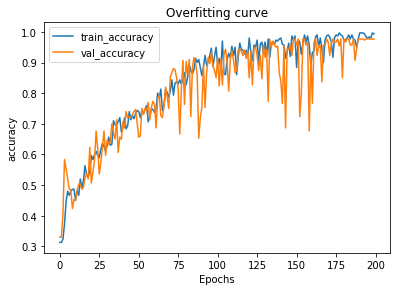

In [92]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('accuracy')
axes.set_title('Overfitting curve')
axes.plot(history.history["acc"],label="train_accuracy")
axes.plot(history.history["val_acc"],label="val_accuracy")
axes.legend(loc=0) 

In [96]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
T_Y_pred=classifier.predict(X_test)
T_Y_pred=np.round(T_Y_pred)
T_Y_pred

array([[1., 0., 0.]], dtype=float32)

Let's generate a test set

In [215]:
[X_test, Y_test] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [216]:
Y_test=keras.utils.to_categorical(Y_test)

In [100]:
classifier.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 116us/step


[0.04496645729367932, 0.9866666666666667]

## Usind Adam's optimizer

In [198]:
classifier_Adam = Sequential()
classifier_Adam.add(Dense(units=3,kernel_initializer= 'uniform',activation="softmax", input_shape=(X_train.shape[1],)))
#classifier_Adam.add(Dropout(rate=0.2))
#classifier_Adam.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu"))
#classifier_Adam.add(Dropout(rate=0.2))
#classifier_Adam.add(Dense(units=3,kernel_initializer= 'uniform',activation="softmax"))
classifier_Adam.compile(optimizer="Adam", loss='categorical_crossentropy', metrics= ["accuracy"])
history=classifier_Adam.fit(X_train,Y_Train,batch_size=32, validation_data=(X_val, Y_val),epochs=200)

Train on 300 samples, validate on 300 samples
Epoch 1/200
300/300 [==============================] - 2s 8ms/step - loss: 1.7984 - acc: 0.3267 - val_loss: 1.7369 - val_acc: 0.3100
Epoch 2/200
300/300 [==============================] - 0s 320us/step - loss: 1.0079 - acc: 0.5533 - val_loss: 0.7713 - val_acc: 0.5900
Epoch 3/200
300/300 [==============================] - 0s 327us/step - loss: 0.7408 - acc: 0.6467 - val_loss: 0.3873 - val_acc: 0.9200
Epoch 4/200
300/300 [==============================] - 0s 314us/step - loss: 0.4707 - acc: 0.8200 - val_loss: 0.3597 - val_acc: 0.9300
Epoch 5/200
300/300 [==============================] - 0s 325us/step - loss: 0.3932 - acc: 0.9000 - val_loss: 0.2713 - val_acc: 0.9733
Epoch 6/200
300/300 [==============================] - 0s 356us/step - loss: 0.3858 - acc: 0.8267 - val_loss: 0.3237 - val_acc: 0.8067
Epoch 7/200
300/300 [==============================] - 0s 307us/step - loss: 0.2907 - acc: 0.9133 - val_loss: 0.2220 - val_acc: 0.9700
Epoch 8/200

Epoch 61/200
300/300 [==============================] - 0s 279us/step - loss: 0.0176 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 62/200
300/300 [==============================] - 0s 268us/step - loss: 0.0168 - acc: 1.0000 - val_loss: 0.0137 - val_acc: 1.0000
Epoch 63/200
300/300 [==============================] - 0s 268us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 64/200
300/300 [==============================] - 0s 264us/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 65/200
300/300 [==============================] - 0s 285us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 66/200
300/300 [==============================] - 0s 295us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 67/200
300/300 [==============================] - 0s 271us/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.0153 - val_acc: 1.0000
Epoch 68/200
300/300 [==========================

300/300 [==============================] - 0s 267us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 122/200
300/300 [==============================] - 0s 263us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 123/200
300/300 [==============================] - 0s 276us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 124/200
300/300 [==============================] - 0s 288us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 125/200
300/300 [==============================] - 0s 280us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 126/200
300/300 [==============================] - 0s 267us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 127/200
300/300 [==============================] - 0s 267us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 128/200
300/300 [==============================] 

Epoch 181/200
300/300 [==============================] - 0s 266us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 182/200
300/300 [==============================] - 0s 265us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 183/200
300/300 [==============================] - 0s 278us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 184/200
300/300 [==============================] - 0s 274us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 185/200
300/300 [==============================] - 0s 275us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 186/200
300/300 [==============================] - 0s 262us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 187/200
300/300 [==============================] - 0s 277us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 188/200
300/300 [==================

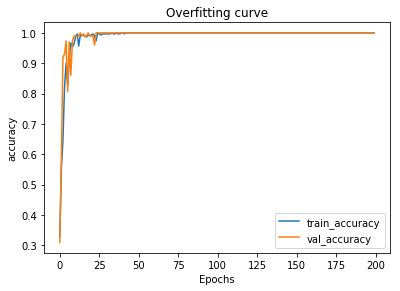

In [199]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('accuracy')
axes.set_title('Overfitting curve')
axes.plot(history.history["acc"],label="train_accuracy")
axes.plot(history.history["val_acc"],label="val_accuracy")
axes.legend(loc=0) 

In [217]:
print(X_test)

[[0.97467751 0.95813039 0.99988369 ... 0.93447655 0.96449513 0.99983192]
 [0.99498723 0.95989605 0.97868047 ... 0.97944586 0.94331355 0.93511745]
 [0.95217124 0.97968912 0.96834917 ... 0.96602158 0.94704791 0.95760729]
 ...
 [0.96389508 0.93517906 0.93435505 ... 0.98843963 0.97139453 0.98111844]
 [0.97091061 0.93611158 0.98045666 ... 0.9589315  0.94723071 0.95058101]
 [0.95907824 0.93928758 0.96136776 ... 0.93308538 0.98714072 0.94631058]]


In [211]:
X_Test = generate_a_rectangle()
if len(X_test)!= 2:
    X_Test = X_Test.reshape(1, X_Test.shape[0])
    T_Y_pred=classifier_Adam.predict(X_Test)
    T_Y_pred=np.round(T_Y_pred)
    print(T_Y_pred)
else:
    X_Test=X_Test[0]
    X_Test = X_Test.reshape(1, X_Test.shape[0])
    T_Y_pred=classifier_Adam.predict(X_Test)
    T_Y_pred=np.round(T_Y_pred)
    print(T_Y_pred)

[[1. 0. 0.]]


In [218]:
classifier_Adam.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 98us/step


[0.0032170275164147217, 1.0]

It seems that it works better using Adam Optimizer as the model converges faster

# Visualization

In [200]:
classifier_Adam.get_weights()

[array([[ 0.01362229, -0.04751815,  0.01579356],
        [ 0.03507516,  0.02985184, -0.01237281],
        [ 0.03619382,  0.04977279, -0.0450702 ],
        ...,
        [-0.01604855,  0.00778853,  0.04798472],
        [-0.02901171, -0.01032796, -0.01742563],
        [-0.00143216,  0.03398039, -0.05157904]], dtype=float32),
 array([ 0.00337611, -0.00047916, -0.00188183], dtype=float32)]

In [205]:
w=classifier_Adam.get_weights()[0]
w1=w[:,0]
w2=w[:,1]
w3=w[:,2]


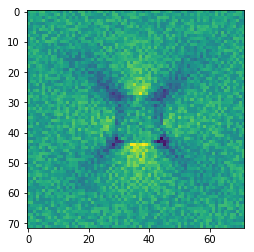

In [206]:
plt.imshow(w1.reshape(72,72), interpolation='nearest')
plt.show()

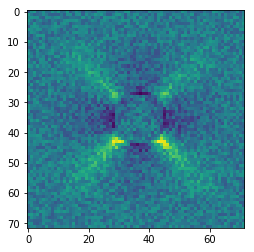

In [207]:
plt.imshow(w2.reshape(72,72), interpolation='nearest')
plt.show()

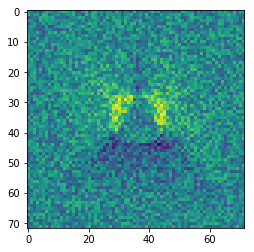

In [208]:
plt.imshow(w3.reshape(72,72), interpolation='nearest')
plt.show()

# A more difficult classification problem

In [142]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [143]:
[X_val, Y_val] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [144]:
Y_val=keras.utils.to_categorical(Y_val)
Y_Train=keras.utils.to_categorical(Y_train)

First with a linear classifier

In [145]:
classifier_Adam = Sequential()
classifier_Adam.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu", input_shape=(X_train.shape[1],)))
classifier_Adam.add(Dropout(rate=0.2))
classifier_Adam.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu"))
classifier_Adam.add(Dropout(rate=0.2))
classifier_Adam.add(Dense(units=3,kernel_initializer= 'uniform',activation="softmax"))
classifier_Adam.compile(optimizer="Adam", loss='categorical_crossentropy', metrics= ["accuracy"])
history=classifier_Adam.fit(X_train,Y_Train,batch_size=32, validation_data=(X_val, Y_val),epochs=200)

Train on 300 samples, validate on 300 samples
Epoch 1/200
300/300 [==============================] - 3s 9ms/step - loss: 1.1141 - acc: 0.3200 - val_loss: 1.0957 - val_acc: 0.3567
Epoch 2/200
300/300 [==============================] - 0s 525us/step - loss: 1.0927 - acc: 0.3867 - val_loss: 1.0874 - val_acc: 0.3800
Epoch 3/200
300/300 [==============================] - 0s 536us/step - loss: 1.0701 - acc: 0.4500 - val_loss: 1.0759 - val_acc: 0.4900
Epoch 4/200
300/300 [==============================] - 0s 587us/step - loss: 1.0583 - acc: 0.4433 - val_loss: 1.0599 - val_acc: 0.4267
Epoch 5/200
300/300 [==============================] - 0s 587us/step - loss: 1.0341 - acc: 0.4800 - val_loss: 1.1021 - val_acc: 0.3567
Epoch 6/200
300/300 [==============================] - 0s 535us/step - loss: 1.0602 - acc: 0.4233 - val_loss: 1.0489 - val_acc: 0.4567
Epoch 7/200
300/300 [==============================] - 0s 635us/step - loss: 0.9956 - acc: 0.5133 - val_loss: 1.0050 - val_acc: 0.5033
Epoch 8/200

Epoch 61/200
300/300 [==============================] - 0s 532us/step - loss: 0.7015 - acc: 0.6300 - val_loss: 0.9197 - val_acc: 0.5433
Epoch 62/200
300/300 [==============================] - 0s 498us/step - loss: 0.7545 - acc: 0.6233 - val_loss: 0.8292 - val_acc: 0.5833
Epoch 63/200
300/300 [==============================] - 0s 496us/step - loss: 0.7352 - acc: 0.6200 - val_loss: 0.8219 - val_acc: 0.6000
Epoch 64/200
300/300 [==============================] - 0s 492us/step - loss: 0.7057 - acc: 0.6233 - val_loss: 0.8611 - val_acc: 0.5533
Epoch 65/200
300/300 [==============================] - 0s 479us/step - loss: 0.7057 - acc: 0.6400 - val_loss: 0.8546 - val_acc: 0.5733
Epoch 66/200
300/300 [==============================] - 0s 508us/step - loss: 0.7117 - acc: 0.6433 - val_loss: 0.8352 - val_acc: 0.5767
Epoch 67/200
300/300 [==============================] - 0s 486us/step - loss: 0.7008 - acc: 0.6133 - val_loss: 0.8635 - val_acc: 0.5667
Epoch 68/200
300/300 [==========================

300/300 [==============================] - 0s 524us/step - loss: 0.7773 - acc: 0.5700 - val_loss: 0.9650 - val_acc: 0.5333
Epoch 122/200
300/300 [==============================] - 0s 521us/step - loss: 0.7653 - acc: 0.6000 - val_loss: 0.8327 - val_acc: 0.6000
Epoch 123/200
300/300 [==============================] - 0s 520us/step - loss: 0.6948 - acc: 0.6233 - val_loss: 0.7938 - val_acc: 0.6067
Epoch 124/200
300/300 [==============================] - 0s 493us/step - loss: 0.6290 - acc: 0.6767 - val_loss: 0.8729 - val_acc: 0.6033
Epoch 125/200
300/300 [==============================] - 0s 484us/step - loss: 0.6795 - acc: 0.6233 - val_loss: 0.8894 - val_acc: 0.5367
Epoch 126/200
300/300 [==============================] - 0s 476us/step - loss: 0.6285 - acc: 0.6600 - val_loss: 0.8982 - val_acc: 0.5767
Epoch 127/200
300/300 [==============================] - 0s 516us/step - loss: 0.6917 - acc: 0.6233 - val_loss: 0.8655 - val_acc: 0.5333
Epoch 128/200
300/300 [==============================] 

Epoch 181/200
300/300 [==============================] - 0s 498us/step - loss: 0.7033 - acc: 0.6433 - val_loss: 0.8586 - val_acc: 0.5367
Epoch 182/200
300/300 [==============================] - 0s 523us/step - loss: 0.6581 - acc: 0.6533 - val_loss: 0.8487 - val_acc: 0.6000
Epoch 183/200
300/300 [==============================] - 0s 517us/step - loss: 0.7141 - acc: 0.6033 - val_loss: 0.8111 - val_acc: 0.6033
Epoch 184/200
300/300 [==============================] - 0s 508us/step - loss: 0.7060 - acc: 0.6633 - val_loss: 0.8490 - val_acc: 0.5567
Epoch 185/200
300/300 [==============================] - 0s 492us/step - loss: 0.6143 - acc: 0.6933 - val_loss: 0.8300 - val_acc: 0.5833
Epoch 186/200
300/300 [==============================] - 0s 528us/step - loss: 0.6361 - acc: 0.6933 - val_loss: 0.8478 - val_acc: 0.6233
Epoch 187/200
300/300 [==============================] - 0s 475us/step - loss: 0.6380 - acc: 0.6867 - val_loss: 0.8433 - val_acc: 0.5667
Epoch 188/200
300/300 [==================

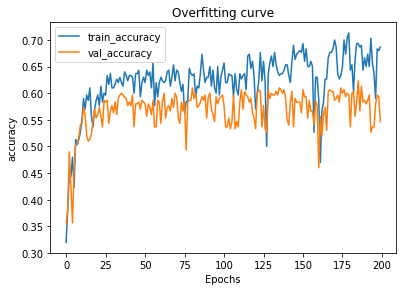

In [146]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('accuracy')
axes.set_title('Overfitting curve')
axes.plot(history.history["acc"],label="train_accuracy")
axes.plot(history.history["val_acc"],label="val_accuracy")
axes.legend(loc=0) 

In [147]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = keras.utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [148]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [149]:
classifier_Adam.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 109us/step


[0.8822430276870727, 0.5433333325386047]

## CNN

In [19]:
class History(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))

In [150]:
X_Train = X_train.reshape([-1, 72,72,1])
X_Val = X_val.reshape([-1, 72,72,1])

In [151]:
X_Train.shape

(300, 72, 72, 1)

In [153]:
CNN_classifier = Sequential()

CNN_classifier.add(Conv2D(16,(5,5),input_shape=(72,72,1,), activation='relu'))
CNN_classifier.add(MaxPooling2D(pool_size=(2,2)))
CNN_classifier.add(Flatten())
CNN_classifier.add(Dense(units=64, kernel_initializer="uniform", activation="relu"))
CNN_classifier.add(Dense(units=3, kernel_initializer="uniform", activation="softmax"))
CNN_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])
#CNN_classifier.fit_generator((X_Train,Y_Train),steps_per_epoch=X_train.shape[0]/32, validation_data=(X_Val, Y_val),epochs=200, validation_steps=X_val.shape[0]/32,callbacks=[History])
#History=History()
#CNN_classifier.fit(X_Train,Y_Train,batch_size=32, validation_data=(X_Val, Y_val),epochs=200,callbacks=[History])
history=CNN_classifier.fit(X_Train,Y_Train,batch_size=32, validation_data=(X_Val, Y_val),epochs=200)


Train on 300 samples, validate on 300 samples
Epoch 1/200
300/300 [==============================] - 5s 18ms/step - loss: 1.0893 - acc: 0.4133 - val_loss: 1.0595 - val_acc: 0.5233
Epoch 2/200
300/300 [==============================] - 2s 7ms/step - loss: 1.0295 - acc: 0.5033 - val_loss: 1.0095 - val_acc: 0.5400
Epoch 3/200
300/300 [==============================] - 2s 7ms/step - loss: 0.9292 - acc: 0.6300 - val_loss: 0.9335 - val_acc: 0.5533
Epoch 4/200
300/300 [==============================] - 2s 7ms/step - loss: 0.8230 - acc: 0.6233 - val_loss: 0.9293 - val_acc: 0.4567
Epoch 5/200
300/300 [==============================] - 2s 7ms/step - loss: 0.7385 - acc: 0.6800 - val_loss: 0.8285 - val_acc: 0.6133
Epoch 6/200
300/300 [==============================] - 3s 9ms/step - loss: 0.6652 - acc: 0.7433 - val_loss: 0.8274 - val_acc: 0.6167
Epoch 7/200
300/300 [==============================] - 3s 8ms/step - loss: 0.5996 - acc: 0.7467 - val_loss: 0.7657 - val_acc: 0.6533
Epoch 8/200
300/300 [=

Epoch 62/200
300/300 [==============================] - 2s 7ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 1.0457 - val_acc: 0.6767
Epoch 63/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 1.0488 - val_acc: 0.6733
Epoch 64/200
300/300 [==============================] - 2s 7ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.0532 - val_acc: 0.6733
Epoch 65/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.0674 - val_acc: 0.6767
Epoch 66/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 1.0660 - val_acc: 0.6733
Epoch 67/200
300/300 [==============================] - 2s 7ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.0731 - val_acc: 0.6767
Epoch 68/200
300/300 [==============================] - 2s 8ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.0723 - val_acc: 0.6767
Epoch 69/200
300/300 [==============================] - 2s 8ms

300/300 [==============================] - 2s 7ms/step - loss: 2.4925e-04 - acc: 1.0000 - val_loss: 1.4426 - val_acc: 0.6800
Epoch 182/200
300/300 [==============================] - 2s 8ms/step - loss: 2.4415e-04 - acc: 1.0000 - val_loss: 1.4443 - val_acc: 0.6800
Epoch 183/200
300/300 [==============================] - 2s 7ms/step - loss: 2.4406e-04 - acc: 1.0000 - val_loss: 1.4468 - val_acc: 0.6800
Epoch 184/200
300/300 [==============================] - 2s 7ms/step - loss: 2.3835e-04 - acc: 1.0000 - val_loss: 1.4500 - val_acc: 0.6767
Epoch 185/200
300/300 [==============================] - 2s 8ms/step - loss: 2.3478e-04 - acc: 1.0000 - val_loss: 1.4500 - val_acc: 0.6800
Epoch 186/200
300/300 [==============================] - 2s 7ms/step - loss: 2.3321e-04 - acc: 1.0000 - val_loss: 1.4490 - val_acc: 0.6800
Epoch 187/200
300/300 [==============================] - 3s 9ms/step - loss: 2.2860e-04 - acc: 1.0000 - val_loss: 1.4531 - val_acc: 0.6767
Epoch 188/200
300/300 [==================

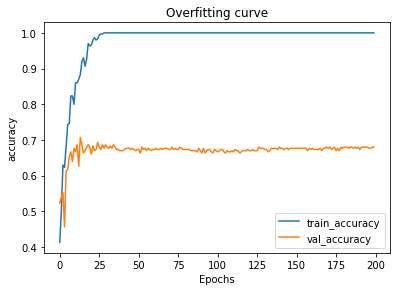

In [154]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('accuracy')
axes.set_title('Overfitting curve')
axes.plot(history.history["acc"],label="train_accuracy")
axes.plot(history.history["val_acc"],label="val_accuracy")
axes.legend(loc=0) 

In [155]:
X_Test = X_test.reshape([-1, 72,72,1])

In [156]:
CNN_classifier.evaluate(X_Test, Y_test)

300/300 [==============================] - 1s 2ms/step


[1.7141394964853922, 0.6833333325386047]

In [157]:
CNN_classifier.metrics_names

['loss', 'acc']

The value of the loss function is 1.71 for the test set we generated

# Regression Problem 

In [12]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [20]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [14]:
X_train.shape

(300, 5184)

In [15]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    print(xy)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

[[0.93029439 0.41698365]
 [0.81922844 0.43764529]
 [0.42194328 0.86440035]]


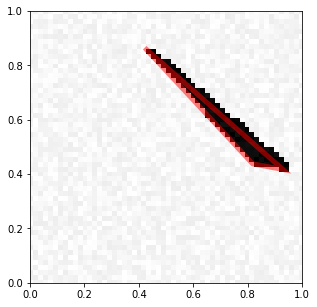

[0.93029439 0.41698365 0.81922844 0.43764529 0.42194328 0.86440035]


In [16]:
visualize_prediction(X_train[0], Y_train[0])
print(Y_train[0])


In [21]:
[X_val, Y_val] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [422]:
#Y_Train=keras.utils.normalize(Y_train, axis=-1, order=2)
#Y_Val=keras.utils.normalize(Y_val, axis=-1, order=2)

In [18]:
#print(Y_train[0])
#print(Y_Train[0])

In [19]:
regressor = Sequential()

In [423]:
regressor.add(Dense(units=128,kernel_initializer= 'uniform',activation="relu", input_shape=(5184,)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=128,kernel_initializer= 'uniform',activation="relu"))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=6,kernel_initializer= 'uniform'))
regressor.compile(optimizer="adam", loss='mse', metrics= ["mse"])
history=regressor.fit(X_train,Y_Train,validation_data=(X_val,Y_Val),batch_size=32, epochs=300)

Train on 300 samples, validate on 300 samples
Epoch 1/300
300/300 [==============================] - 6s 19ms/step - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 2/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 3/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 4/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 5/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 6/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0449 - mean_squared_error: 0.0449 - val_loss: 0.0407 - val_me

Epoch 51/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 52/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 53/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 54/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 55/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 56/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 57/300
300

Epoch 101/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 102/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 103/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 104/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 105/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 106/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 107/

Epoch 200/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 201/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 202/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 203/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 204/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 205/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 206/

Epoch 299/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 300/300
300/300 [==============================] - 0s 1ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0348 - val_mean_squared_error: 0.0348


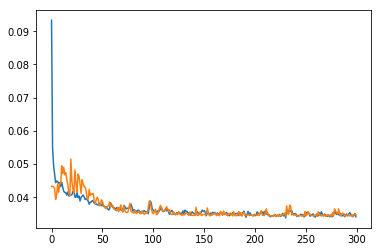

In [424]:
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_mean_squared_error"])
         

In [23]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [24]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [429]:
#Y_Test=keras.utils.normalize(Y_test, axis=-1, order=2)

In [411]:
regressor.metrics_names

['loss', 'mean_squared_error']

In [427]:
Y_pred=regressor.predict(X_test)

In [428]:
print(Y_pred)

[[0.4104989  0.3146329  0.40460622 0.3243391  0.38512442 0.31943044]
 [0.3595127  0.35893887 0.34098202 0.35986665 0.35138887 0.3991903 ]
 [0.31707558 0.3721164  0.30614203 0.39155912 0.3316222  0.43039623]
 ...
 [0.4104989  0.3146329  0.40460622 0.3243391  0.38512442 0.31943044]
 [0.3033741  0.3723079  0.29866663 0.40341854 0.32690948 0.43425193]
 [0.35720983 0.360342   0.3385868  0.3614015  0.35011578 0.40201843]]


[[0.23325432 0.15415605]
 [0.5149824  0.45317341]
 [0.32182751 0.87390724]]


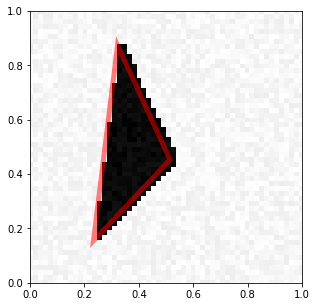

[[0.31707558 0.3721164 ]
 [0.30614203 0.39155912]
 [0.3316222  0.43039623]]


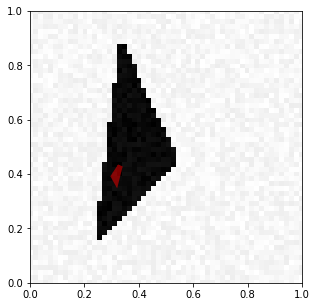

In [430]:
visualize_prediction(X_test[2], Y_test[2])
visualize_prediction(X_test[2], Y_pred[2])

## Using a CNN

In [25]:
X_Train = X_train.reshape([-1, 72,72,1])
X_Val = X_val.reshape([-1, 72,72,1])

In [27]:
CNN_regressor = Sequential()

CNN_regressor.add(Conv2D(256,(3,3),input_shape=(72,72,1,),padding="same", activation='relu'))
CNN_regressor.add(BatchNormalization())
CNN_regressor.add(MaxPooling2D(pool_size=(2,2)))

CNN_regressor.add(Conv2D(256,(3,3),input_shape=(72,72,1,), padding="same",activation='relu'))
CNN_regressor.add(BatchNormalization())
CNN_regressor.add(MaxPooling2D(pool_size=(2,2)))

CNN_regressor.add(Conv2D(256,(3,3),input_shape=(72,72,1,), padding="same",activation='relu'))
CNN_regressor.add(BatchNormalization())
CNN_regressor.add(MaxPooling2D(pool_size=(2,2)))

CNN_regressor.add(Conv2D(256,(3,3),input_shape=(72,72,1,), padding="same",activation='relu'))
CNN_regressor.add(BatchNormalization())
CNN_regressor.add(MaxPooling2D(pool_size=(2,2)))


CNN_regressor.add(Flatten())
CNN_regressor.add(Dense(units=64, kernel_initializer="uniform", activation="relu"))
CNN_regressor.add(Dense(units=6, kernel_initializer="uniform"))
CNN_regressor.compile(loss='mse', optimizer='adam', metrics= ["mse"])
#CNN_classifier.fit_generator((X_Train,Y_Train),steps_per_epoch=X_train.shape[0]/32, validation_data=(X_Val, Y_val),epochs=200, validation_steps=X_val.shape[0]/32,callbacks=[History])
history=CNN_regressor.fit(X_Train,Y_train,batch_size=32, validation_data=(X_Val, Y_val),epochs=40)

Train on 300 samples, validate on 300 samples
Epoch 1/40
300/300 [==============================] - 152s 508ms/step - loss: 0.4517 - mean_squared_error: 0.4517 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 2/40
300/300 [==============================] - 142s 472ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 3/40
300/300 [==============================] - 141s 471ms/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.1237 - val_mean_squared_error: 0.1237
Epoch 4/40
300/300 [==============================] - 141s 471ms/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0902 - val_mean_squared_error: 0.0902
Epoch 5/40
300/300 [==============================] - 141s 469ms/step - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 6/40
300/300 [==============================] - 142s 472ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss

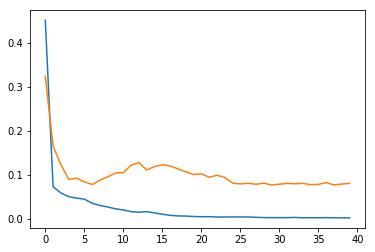

In [28]:
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_mean_squared_error"])

In [29]:
X_Test = X_test[0].reshape([-1, 72,72,1])

In [30]:
Y_pred=CNN_regressor.predict(X_Test)

[[0.94133439 0.93818117]
 [0.67661723 0.27556678]
 [0.36340393 0.33217252]]


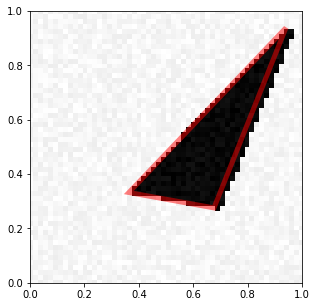

[[0.41977933 0.5530795 ]
 [0.8641708  0.7339145 ]
 [0.88561374 0.66406953]]


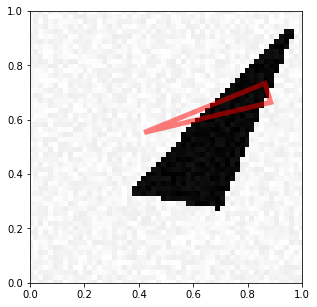

In [31]:
visualize_prediction(X_test[0], Y_test[0])
visualize_prediction(X_Test, Y_pred[0])

# Image Denoising 

In [363]:
image_size=72

In [364]:
def generate_a_rectangle_denoising(noise):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    corners = np.random.random(4)*figsize
    top = max(corners[0], corners[1])
    bottom = min(corners[0], corners[1])
    left = min(corners[2], corners[3])
    right = max(corners[2], corners[3])
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return [generate_a_drawing(figsize, U, V,0),generate_a_drawing(figsize, U, V, noise)]

In [365]:
def generate_a_disk_denoising(noise):
    figsize = 1.0
    center = np.random.random(2)*figsize
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return [generate_a_drawing(figsize, U, V,0),generate_a_drawing(figsize, U, V, noise)]

In [366]:
def generate_a_triangle_denoising(noise):
    figsize = 1.0
    U = np.random.random(3)*figsize
    V = np.random.random(3)*figsize
    imdata = [generate_a_drawing(figsize, U, V,0),generate_a_drawing(figsize, U, V, noise)]
    return imdata

In [367]:
def generate_dataset_denoising(nb_samples, noise, free_location=False):
    # Getting im_size:
    im_size = image_size**2
    imdata = np.zeros([nb_samples,im_size])
    imdata_noise=np.zeros([nb_samples,im_size])
    #Y = np.zeros(nb_samples)
    #Y_1 = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            imdata[i],imdata_noise[i] = generate_a_rectangle_denoising(noise)
        elif category == 1: 
            imdata[i],imdata_noise[i] = generate_a_disk_denoising(noise)
        else:
            imdata[i],imdata_noise[i] = generate_a_triangle_denoising(noise)
    imdata_noise = (imdata_noise + noise) / (255 + 2 * noise)
    imdata = imdata/255
    
    return [imdata,imdata_noise]

In [368]:
[imdata,imdata_noise]=generate_dataset_denoising(300,20,True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [369]:
imdata.shape

(300, 5184)

In [370]:
imdata_noise.shape

(300, 5184)

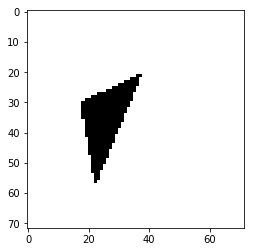

In [371]:
plt.imshow(imdata[245].reshape(image_size,image_size), cmap='gray')

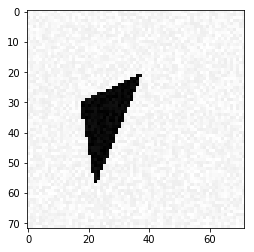

In [372]:
plt.imshow(imdata_noise[245].reshape(image_size,image_size), cmap='gray')

In [373]:
Imdata_Noise = imdata_noise.reshape([imdata_noise.shape[0], image_size,image_size,1])

In [374]:
Imdata = imdata.reshape([imdata.shape[0], image_size,image_size,1])

In [375]:
Imdata_Noise.shape

(300, 72, 72, 1)

In [381]:
def u_net(input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,)):
    inputs = Input(shape=input_shape)
    conv1a = Conv2D(64, (3, 3), padding="same", activation='relu')(inputs)
    conv1b = Conv2D(64, (3, 3), padding="same",activation='relu')(conv1a)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)
                   
    conv2a = Conv2D(128, (3, 3),padding="same", activation = 'relu')(pool1)
    conv2b = Conv2D(128, (3, 3), padding="same",activation = 'relu')(conv2a)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)
    
    conv3a = Conv2D(256, (3, 3), padding="same",activation = 'relu')(pool2)
    conv3b = Conv2D(256, (3, 3), padding="same",activation = 'relu')(conv3a)
    pool3 = MaxPooling2D(pool_size=(2, 2),padding="same")(conv3b)
    
    #conv4a = Conv2D(512, (3, 3), padding="same",activation = 'relu')(pool3)
    #conv4b = Conv2D(512, (3, 3), padding="same",activation = 'relu')(conv4a)
    #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4b)
                    
    #conv5a = Conv2D(1024, (3, 3), padding="same",activation = 'relu')(pool4)
    #conv5b = Conv2D(1024, (3, 3), padding="same",activation = 'relu')(conv5a)
    #pool5 = MaxPooling2D(pool_size=(2, 2))(conv5b)
    
    
    #up6 = UpSampling2D(size = (2,2))(pool5)
    #up_conv6 = Conv2D(512, 2, padding="same",activation = 'relu')(up6)
    #merge6 = concatenate([crop_conv4,up_conv6],axis=3)
    #conv6b = Conv2D(512, 3, padding="same",activation = 'relu')(up_conv6) 
    #conv6c = Conv2D(512, 3, padding="same",activation = 'relu')(conv6b)
    
    #up7 = UpSampling2D(size = (2,2))(pool4)
    #up_conv7 = Conv2D(256, 2, padding="same",activation = 'relu')(up7) 
    #merge7 = concatenate([crop_conv3,up_conv7],axis=3)
    #conv7b = Conv2D(256, (3, 3), padding="same",activation = 'relu')(up_conv7)
    #conv7c = Conv2D(256, (3, 3), padding="same",activation = 'relu')(conv7b)
     
    #model = Model(input = inputs, output = pool3)    
    #model.summary()
    
    up8 = UpSampling2D(size = (2,2))(pool3)
    up_conv8 = Conv2D(128, 2, padding="same",activation = 'relu')(up8) 
    merge8 = concatenate([pool2,up_conv8],axis=3)
    conv8b = Conv2D(128, (3, 3), padding="same",activation = 'relu')(up_conv8)
    conv8c = Conv2D(128, (3, 3), padding="same",activation = 'relu')(conv8b)
                    
    up9 = UpSampling2D(size = (2,2))(conv8c)
    up_conv9 = Conv2D(64, 2, padding="same",activation = 'relu')(up9)
    merge9 = concatenate([pool1,up_conv9],axis=3)
    conv9b = Conv2D(64, (3, 3), padding="same",activation = 'relu')(up_conv9) 
    conv9c = Conv2D(64, (3, 3), padding="same",activation = 'relu')(conv9b)
    
    up10 = UpSampling2D(size = (2,2))(conv9c)
    up_conv10 = Conv2D(64, 2, padding="same",activation = 'relu')(up10)
    conv10 = Conv2D(1, 1, padding="same",activation = 'sigmoid')(up_conv10)
    
    model = Model(input = inputs, output = conv10)
                    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    
    return model

In [382]:
hourglass=u_net()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [383]:
hourglass.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_413 (Conv2D)          (None, 72, 72, 64)        640       
_________________________________________________________________
conv2d_414 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_415 (Conv2D)          (None, 36, 36, 128)       73856     
_________________________________________________________________
conv2d_416 (Conv2D)          (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 18, 18, 128)       0         
__________

In [389]:
history=hourglass.fit(x=Imdata_Noise,y=Imdata,batch_size=32,epochs=15)

Epoch 1/15
300/300 [==============================] - 85s 283ms/step - loss: 0.1001
Epoch 2/15
300/300 [==============================] - 85s 283ms/step - loss: 0.0831
Epoch 3/15
300/300 [==============================] - 85s 284ms/step - loss: 0.0956
Epoch 4/15
300/300 [==============================] - 85s 284ms/step - loss: 0.0829
Epoch 5/15
300/300 [==============================] - 86s 288ms/step - loss: 0.0513
Epoch 6/15
300/300 [==============================] - 86s 286ms/step - loss: 0.0282
Epoch 7/15
300/300 [==============================] - 85s 284ms/step - loss: 0.0195
Epoch 8/15
300/300 [==============================] - 85s 284ms/step - loss: 0.0186
Epoch 9/15
300/300 [==============================] - 85s 282ms/step - loss: 0.0136
Epoch 10/15
300/300 [==============================] - 84s 281ms/step - loss: 0.0110
Epoch 11/15
300/300 [==============================] - 85s 284ms/step - loss: 0.0105
Epoch 12/15
300/300 [==============================] - 86s 285ms/step - lo

In [390]:
R_Imdata_Noise = Imdata_Noise[0].reshape([-1, IMAGE_SIZE,IMAGE_SIZE,1])

In [391]:
D_Imdata=hourglass.predict(R_Imdata_Noise)

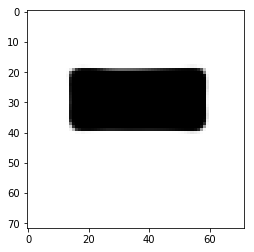

In [392]:
plt.imshow(D_Imdata.reshape(72,72), cmap='gray')

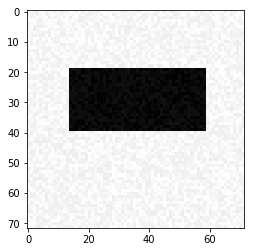

In [393]:
plt.imshow(R_Imdata_Noise.reshape(72,72), cmap='gray')